<a href="https://colab.research.google.com/github/Arpitkamal/DL-105---Training-Feedforward-Neural-Networks/blob/master/VectorizedFeedForwardNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline

1.   Why vectorisation
2.   Vectorisation examples
3.   Scalar class - recap
4.   Class with vectorised Weights
5.   Class with vectorised weights and inputs
6.   Exercise



# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [0]:
np.random.seed(0)

# Testing vectorisation

In [0]:
N = 100
M = 200
a = np.random.randn(N, M)
b = np.random.randn(N, M)
c = np.zeros((N, M))

In [6]:
%%time
for i in range(N):
  for j in range(M):
    c[i,j] = a[i, j] + b[i, j]

CPU times: user 19.8 ms, sys: 67 µs, total: 19.9 ms
Wall time: 20.2 ms


In [7]:
%%time
c = a + b

CPU times: user 257 µs, sys: 53 µs, total: 310 µs
Wall time: 213 µs


In [8]:
%%time
for i in range(N):
  for j in range(M):
    c[i, j] = np.sin(a[i, j])

CPU times: user 41 ms, sys: 702 µs, total: 41.7 ms
Wall time: 44 ms


In [9]:
%%time
c = np.sin(a)

CPU times: user 910 µs, sys: 0 ns, total: 910 µs
Wall time: 1.01 ms


In [10]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


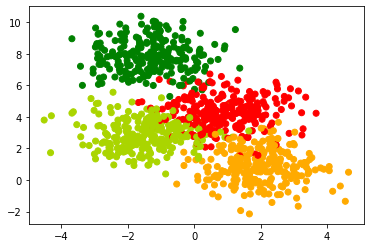

In [11]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels, 2)

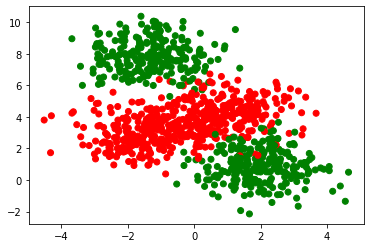

In [13]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [15]:
enc = OneHotEncoder()
# 0 -> (1,0,0,0), 1 -> (0,1,0,0), 2 -> (0,0,1,0), 3 -> (0,0,0,1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


In [16]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)
print(W1)
print(W2)

[[-1.93950036  0.73885045]
 [ 1.39468453 -0.81358502]]
[[-0.818822   -0.1027978   1.23934523  0.3642774 ]
 [-1.16663743 -0.50382808  0.11141039 -1.53470286]]


# Scalar Version

In [0]:
class FF_MultiClass_Scalar:

  def __init__(self, W1, W2):
    self.w1 = W1[0][0].copy()
    self.w2 = W1[1][0].copy()
    self.w3 = W1[0][1].copy()
    self.w4 = W1[1][1].copy()
    self.w5 = W2[0][0].copy()
    self.w6 = W2[1][0].copy()
    self.w7 = W2[0][1].copy()
    self.w8 = W2[1][1].copy()
    self.w9 = W2[0][2].copy()
    self.w10 = W2[1][2].copy()
    self.w11 = W2[0][3].copy()
    self.w12 = W2[1][3].copy()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x

    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)

    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps #softmax 
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps

    return np.array([self.h3, self.h4, self.h5, self.h6])  

  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    #pre-activation
    self.da3 = (self.h3-self.y1)  # partial derivative of loss function w.r.t da3
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h4-self.y3)  
    self.da6 = (self.h6-self.y4)

    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3

    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db4 = self.da4

    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db5 = self.da5

    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db6 = self.da6 

    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12

    self.da1 = self.dh1 * self.h1*(1-self.h1)  #sigmoid derivative
    self.da2 = self.dh2 * self.h2*(1-self.h2) 

    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1

    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2

  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=True, initialise=True):

    if display_loss:
      loss = {}
      w1 = {}

      for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
        dw1, dw2, dw3, dw4, dw5, dw6,dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6 = [0]*18
        for x, y in zip(X, Y):
          self.grad(x, y)
          dw1 += self.dw1
          dw2 += self.dw2
          dw3 += self.dw3
          dw4 += self.dw4
          dw5 += self.dw5
          dw6 += self.dw6
          dw7 += self.dw7
          dw8 += self.dw8
          dw9 += self.dw9
          dw10 += self.dw10
          dw11 += self.dw11
          dw12 += self.dw12
          db1 += self.db1
          db2 += self.db2
          db3 += self.db3
          db4 += self.db4
          db5 += self.db5
          db6 += self.db6

        m = X.shape[0]
        self.w1 -= learning_rate * dw1/m
        self.w2 -= learning_rate * dw2/m
        self.w3 -= learning_rate * dw3/m
        self.w4 -= learning_rate * dw4/m
        self.w5 -= learning_rate * dw5/m
        self.w6 -= learning_rate * dw6/m
        self.w7 -= learning_rate * dw7/m
        self.w8 -= learning_rate * dw8/m
        self.w9 -= learning_rate * dw9/m
        self.w10 -= learning_rate * dw10/m
        self.w11 -= learning_rate * dw11/m
        self.w12 -= learning_rate * dw12/m
        self.b1 -= learning_rate * db1/m
        self.b2 -= learning_rate * db2/m
        self.b3 -= learning_rate * db3/m
        self.b4 -= learning_rate * db4/m
        self.b5 -= learning_rate * db5/m
        self.b6 -= learning_rate * db6/m
        


        if display_loss:
          Y_pred = self.predict(X)
          loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      if display_loss:
        Wt1 = [[self.w1, self.w3], [self.w2, self.w4]]
        Wt2 = [[self.w5, self.w6, self.w7, self.w8],[self.w9, self.w10, self.w11, self.w12]]
        plt.plot(list(loss.values()))
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.show() 


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)


# Weight Vectorised Version

In [0]:
class FF_MultiClass_Weightvectorised:

  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    x = x.reshape(1, -1) # (1,2)
    self.A1 = np.matmul(x,self.W1) + self.B1 # (1,2) * (2, 2) -> (1, 2)
    self.H1 = self.sigmoid(self.A1)  # (1,2)
    self.A2 = np.matmul(self.H1, self.W2) + self.B2 # (1, 2) * (2, 4) -> (1,4)
    self.H2 = self.softmax(self.A2) # (1,4)
    return self.H2 

  def grad_sigmoid(self, x):
    return x*(1-x)

  def grad(self, x, y):
    self.forward_pass(x)
    x = x.reshape(1, -1) #(1, 2)
    y = y.reshape(1, -1) #(1, 4)

    self.dA2 = self.H2 - y #(1, 4)

    self.dW2 = np.matmul(self.H1.T, self.dA2) #(2, 1) * (1, 4) -> (2, 4)
    self.dB2 = self.dA2 # (1, 4)
    self.dH1 = np.matmul(self.dA2, self.W2.T) # (1, 4) * (4, 2) -> (1, 2)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1))  # -> (1, 2)

    self.dW1 = np.matmul(x.T, self.dA1) # (2, 1) * (1, 2) -> (2,2)
    self.dB1 = self.dA1 #(1, 2)

  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=True, initialise=True):

    if display_loss:
      loss = {}
      w1 = {}

      for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
       dW1 = np.zeros((2,2))
       dW2 = np.zeros((2,4))
       dB1 = np.zeros((1,2))
       dB2 = np.zeros((1,4))
       for x, y in zip(X, Y):
         self.grad(x, y)
         dW1 += self.dW1
         dW2 += self.dW2
         dB1 += self.dB1
         dB2 += self.dB2

       m = X.shape[0]
       self.W2 -= learning_rate * (dW2/m)
       self.B2 -= learning_rate * (dB2/m)
       self.W1 -= learning_rate * (dW1/m)
       self.B1 -= learning_rate * (dB1/m)
        
       if display_loss:
          Y_pred = self.predict(X)
          loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
          
       
    if display_loss:
        plt.plot(list(loss.values()))
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.show() 

  def predict(self, X):
      Y_pred = []
      for x in X:
        y_pred = self.forward_pass(x)
        Y_pred.append(y_pred)
      return np.array(Y_pred).squeeze()


# Input + Weight Vectorised Version

In [0]:
class FF_MultiClass_InputWeightvectorised:

  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))

  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)

  def forward_pass(self, X):
    self.A1 = np.matmul(X,self.W1) + self.B1 # (N,2) * (2, 2) -> (N, 2)
    self.H1 = self.sigmoid(self.A1)  # (N,2)
    self.A2 = np.matmul(self.H1, self.W2) + self.B2 # (N, 2) * (2, 4) -> (N, 4)
    self.H2 = self.softmax(self.A2) # (N,4)
    return self.H2 

  def grad_sigmoid(self, X):
    return X*(1-X)

  def grad(self, X, Y):
    self.forward_pass(X)
    m = X.shape[0]

    self.dA2 = self.H2 - Y #(N, 4)

    self.dW2 = np.matmul(self.H1.T, self.dA2) #(2, N) * (N, 4) -> (2, 4)
    self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) # (N, 4) -> (1, 4)
    self.dH1 = np.matmul(self.dA2, self.W2.T) # (N, 4) * (4, 2) -> (N, 2)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1))  # -> (N, 2) .* (N, 2) -> (N, 2)

    self.dW1 = np.matmul(X.T, self.dA1) # (2, N) * (N, 2) -> (2,2)
    self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1) #(N, 2) -> (N, 2)

  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=True, initialise=True):

    if display_loss:
      loss = {}
      w1 = {}

      for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
        self.grad(X, Y) # X -> (N, 2), Y -> (N, 4)

        m = X.shape[0]
        self.W2 -= learning_rate * (self.dW2/m)
        self.B2 -= learning_rate * (self.dB2/m)
        self.W1 -= learning_rate * (self.dW1/m)
        self.B1 -= learning_rate * (self.dB1/m)
        
        if display_loss:
          Y_pred = self.predict(X)
          loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
          
       
      if display_loss:
        plt.plot(list(loss.values()))
        plt.xlabel('Epochs')
        plt.ylabel('Log Loss')
        plt.show() 

  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()


# SEction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


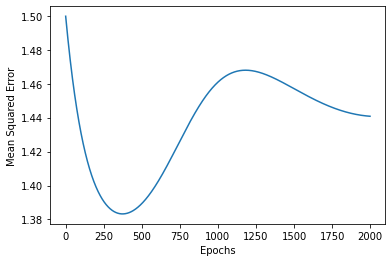

Time taken by model 1: 118.09155583381653


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


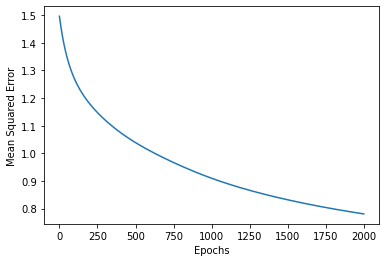

Time taken by model 2: 83.60547876358032


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


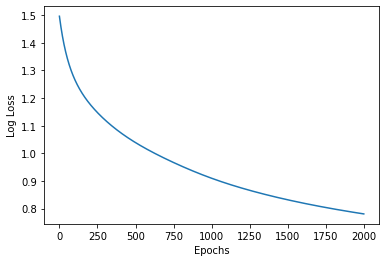

Time taken by model 3: 3.0297205448150635


In [60]:
models_init = [FF_MultiClass_Scalar(W1, W2), FF_MultiClass_Weightvectorised(W1, W2), FF_MultiClass_InputWeightvectorised(W1, W2)]
models = []
for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_mutli_specific = model
  ffsn_mutli_specific.fit(X_train, y_OH_train, epochs=2000, learning_rate=.02, display_loss= True)
  models.append(ffsn_mutli_specific)
  toc = time.time()
  print("Time taken by model {}: {}".format(idx, toc-tic))

In [61]:
for idx, model in enumerate(models, start=1):
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train,1)

  Y_pred_val = model.predict(X_val)
  Y_pred_val = np.argmax(Y_pred_val, 1)

  accuracy_train = accuracy_score(Y_pred_train, Y_train)
  accuracy_val = accuracy_score(Y_pred_val, Y_val)

  print("model {}".format(idx))
  print("Training accuracy", round(accuracy_train, 2))
  print("Validation accuracy", round(accuracy_val, 2))

model 1
Training accuracy 0.49
Validation accuracy 0.48
model 2
Training accuracy 0.71
Validation accuracy 0.72
model 3
Training accuracy 0.71
Validation accuracy 0.72


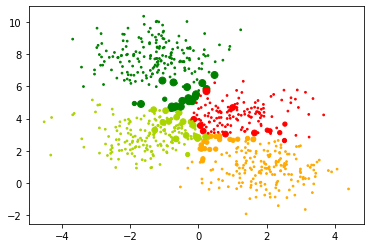

In [59]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(Y_pred_train-Y_train)+.2))
plt.show()